### Imports + Loading Data:

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import ast

In [55]:
BERT_bank_df = pd.read_csv("BERT_bank.csv")
BERT_bank_df = BERT_bank_df.drop(BERT_bank_df.columns[0], axis=1)
BERT_bank_df["All Predictions"] = BERT_bank_df["All Predictions"].apply(ast.literal_eval)

In [56]:
out_of_topic_manual = pd.read_csv("out_of_topic_final.csv")
errors_raw = BERT_bank_df[(BERT_bank_df["Assigned label"] != BERT_bank_df["Cluster label"])]
out_of_topic_raw = BERT_bank_df[(BERT_bank_df["Assigned label"] != BERT_bank_df["Cluster label"]) & (BERT_bank_df["Assigned topic name"] != BERT_bank_df["Cluster topic name"])]
in_topic_raw = BERT_bank_df[(BERT_bank_df["Assigned label"] != BERT_bank_df["Cluster label"]) & (BERT_bank_df["Assigned topic name"] == BERT_bank_df["Cluster topic name"])]

In [63]:
len(errors_raw[errors_raw["Cluster label"].isna()])

11

In [66]:
outliers = errors_raw[errors_raw["Cluster label"].isna()]
outliers

,Utterance,Assigned label,Predicted label,Predicted confidence,Cluster label,Cluster confidence,Assigned topic name,Predicted topic name,Cluster topic name,All Predictions
345,Can I space out how often money is transferred...,automatic_top_up,balance_not_updated_after_bank_transfer,0.288993,NaN,0.0,top_up,transfers,unknown,"[{'label': 'Refund_not_showing_up', 'score': 0..."
428,What currency's can i exchange for?,exchange_via_app,fiat_currency_support,0.517035,NaN,0.0,exchange_rate_currency,exchange_rate_currency,unknown,"[{'label': 'Refund_not_showing_up', 'score': 0..."
1020,What happened to my top-up?,top_up_reverted,top_up_reverted,0.617354,NaN,0.0,top_up,top_up,unknown,"[{'label': 'Refund_not_showing_up', 'score': 0..."
1101,I think my statement has a fraudulent charge,card_payment_not_recognised,card_payment_not_recognised,0.409198,NaN,0.0,card_payment,card_payment,unknown,"[{'label': 'Refund_not_showing_up', 'score': 0..."
1351,Why is my money gone right when I attempted to...,topping_up_by_card,top_up_failed,0.634920,NaN,0.0,top_up,top_up,unknown,"[{'label': 'Refund_not_showing_up', 'score': 0..."
1438,Can I use app to freeze my card and dispute fr...,compromised_card,card_payment_not_recognised,0.552020,NaN,0.0,new_card,card_payment,unknown,"[{'label': 'Refund_not_showing_up', 'score': 0..."
2446,Need to deposit a cheque into my account,top_up_by_cash_or_cheque,top_up_by_cash_or_cheque,0.547070,NaN,0.0,top_up,top_up,unknown,"[{'label': 'Refund_not_showing_up', 'score': 0..."
2531,Can I make multiple online transactions with m...,virtual_card_not_working,get_disposable_virtual_card,0.476906,NaN,0.0,virtual_disposable_cards,virtual_disposable_cards,unknown,"[{'label': 'Refund_not_showing_up', 'score': 0..."
2617,how do i get a virtual card for one time use,get_disposable_virtual_card,get_disposable_virtual_card,0.741567,NaN,0.0,virtual_disposable_cards,virtual_disposable_cards,unknown,"[{'label': 'Refund_not_showing_up', 'score': 0..."
2642,I have a top up that didn't go through. Why?,top_up_failed,top_up_failed,0.775243,NaN,0.0,top_up,top_up,unknown,"[{'label': 'Refund_not_showing_up', 'score': 0..."


In [ ]:
errors_raw.dropna(inplace=True)
in_topic_raw.dropna(inplace=True)
out_of_topic_raw.dropna(inplace=True)

In [4]:
print("Total Number of Errors where predicted != cluster:",len(errors_raw),"\n")
print("Number of Out of Topic Errors where predicted != cluster:",len(out_of_topic_raw),"\n")
print("Number of In Topic Errors where predicted != cluster:",len(in_topic_raw))

Total Number of Errors where predicted != cluster: 212 

Number of Out of Topic Errors where predicted != cluster: 83 

Number of In Topic Errors where predicted != cluster: 129


### Out of Topic Errors:

In [5]:
out_of_topic_df = pd.read_csv("out_of_topic_final.csv")

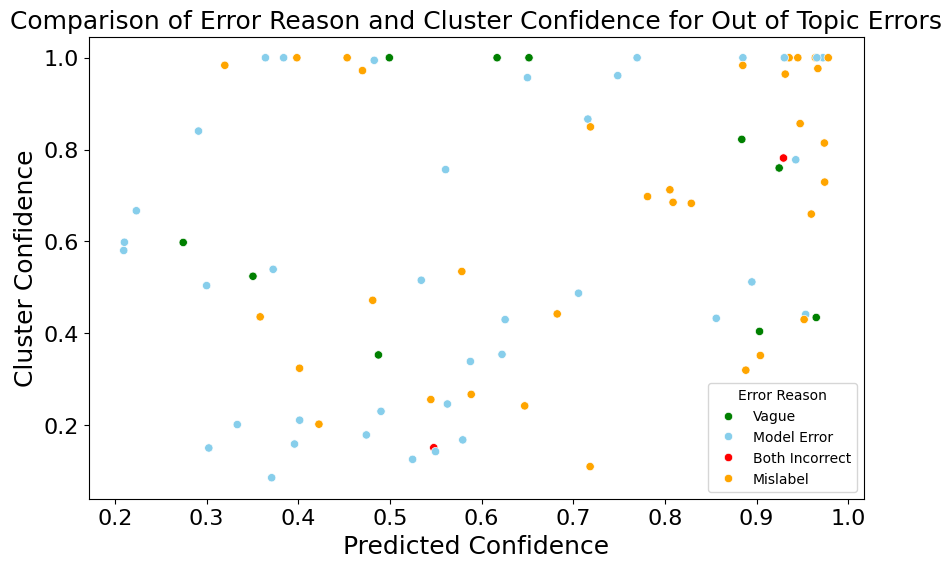

In [6]:
plt.figure(figsize=(10, 6))

error_reason_palette = {"Mislabel": "orange", "Model Error": "skyblue", "Vague": "green","Both Incorrect": "red"}

sns.scatterplot(data=out_of_topic_df, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette = error_reason_palette)
plt.legend(title="Error Reason")

plt.title('Comparison of Error Reason and Cluster Confidence for Out of Topic Errors', fontsize=18)

plt.xlabel('Predicted Confidence', fontsize=18)
plt.ylabel('Cluster Confidence', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('cluster_confidence_scatter_out.png', dpi=300)

plt.show()

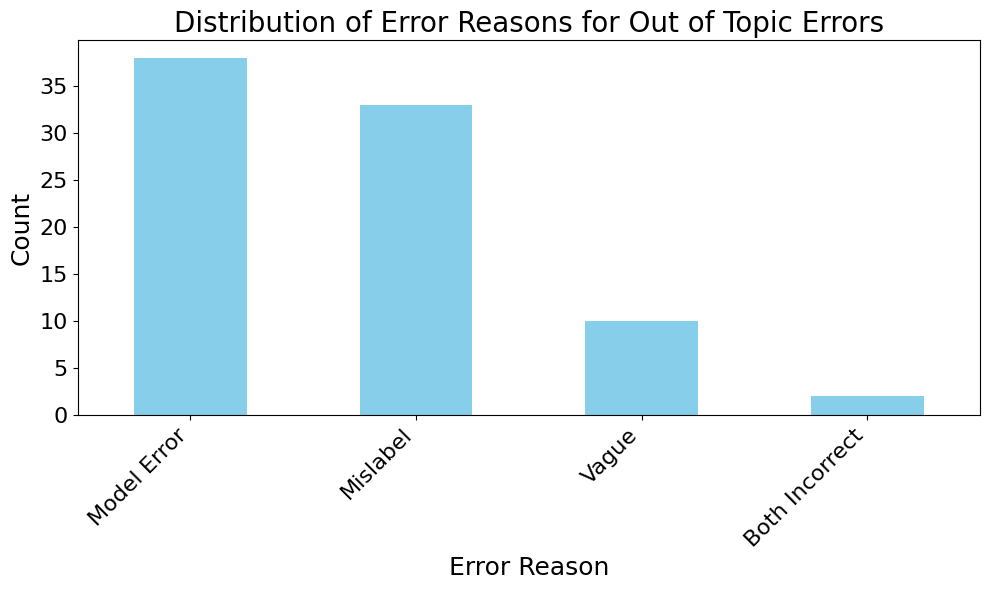

In [7]:
error_counts_out = out_of_topic_df['Error Reason'].value_counts()

plt.figure(figsize=(10, 6))
error_counts_out.plot(kind='bar', color='skyblue')

plt.title('Distribution of Error Reasons for Out of Topic Errors', fontsize=20)

plt.xlabel('Error Reason', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()

plt.savefig('error_reasons_distribution_out.png', dpi=300)

plt.show()

In [8]:
error_counts_out = out_of_topic_df['Error Reason'].value_counts()
error_counts_out

Error Reason
Model Error       38
Mislabel          33
Vague             10
Both Incorrect     2
Name: count, dtype: int64

In [9]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

mislabels_out = out_of_topic_df[out_of_topic_df['Error Reason'] == "Mislabel"].copy()
mislabels_out['cluster_bins'] = pd.cut(mislabels_out['Cluster confidence'], bins)
mislabel_bins_out = mislabels_out['cluster_bins'].value_counts(sort=False)


model_error_out = out_of_topic_df[out_of_topic_df['Error Reason'] == "Model Error"].copy()
model_error_out['cluster_bins'] = pd.cut(model_error_out['Cluster confidence'], bins)
model_error_bins_out = model_error_out['cluster_bins'].value_counts(sort=False)

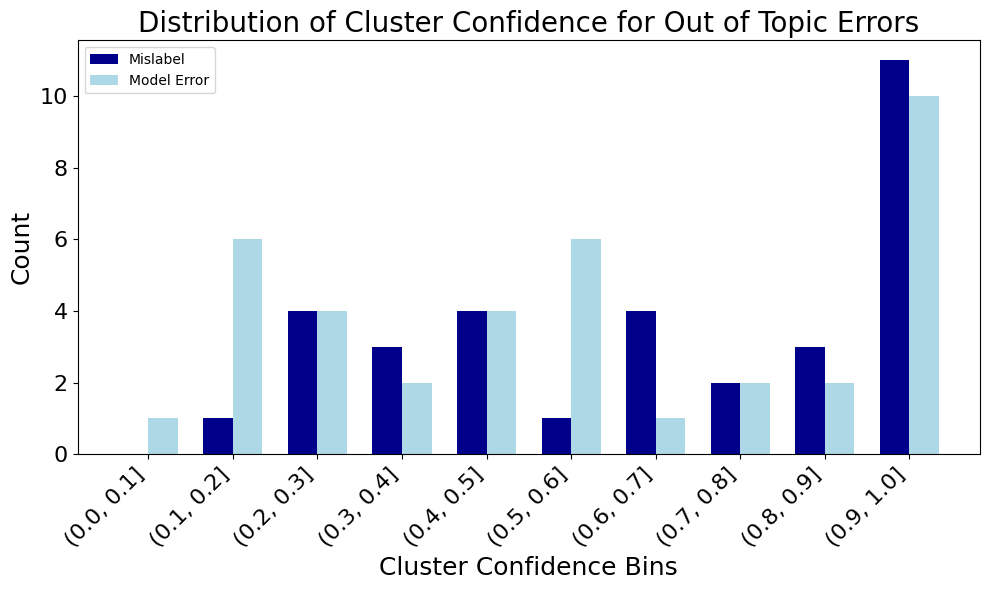

In [10]:
bar_width = 0.35
index = range(len(mislabel_bins_out))
plt.figure(figsize=(10, 6))
plt.bar(index, mislabel_bins_out, bar_width, color='darkblue', label='Mislabel')
plt.bar([i + bar_width for i in index], model_error_bins_out, bar_width, color='lightblue', label='Model Error')

plt.title('Distribution of Cluster Confidence for Out of Topic Errors', fontsize=20)

plt.xlabel('Cluster Confidence Bins', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.xticks([i + bar_width / 2 for i in index], [str(bin) for bin in mislabel_bins_out.index], rotation=45, ha='right')

plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.legend()

plt.tight_layout()

plt.savefig('cluster_bins_out.png', dpi=300)

plt.show()

### In Topic Errors:

In [11]:
within_topic_df = pd.read_csv("in_topic_final.csv")
within_topic_df.loc[40, "Error Reason"] = "Both Incorrect"

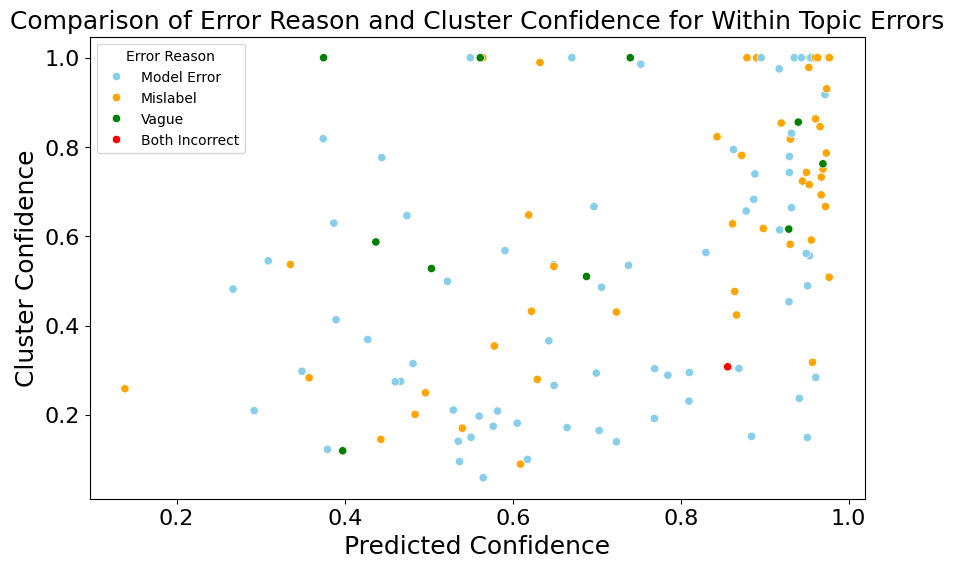

In [12]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=within_topic_df, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette=error_reason_palette)
plt.legend(title="Error Reason")

plt.title('Comparison of Error Reason and Cluster Confidence for Within Topic Errors', fontsize=18)

plt.xlabel('Predicted Confidence', fontsize=18)
plt.ylabel('Cluster Confidence', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('cluster_confidence_scatter_in.png', dpi=300)

plt.show()

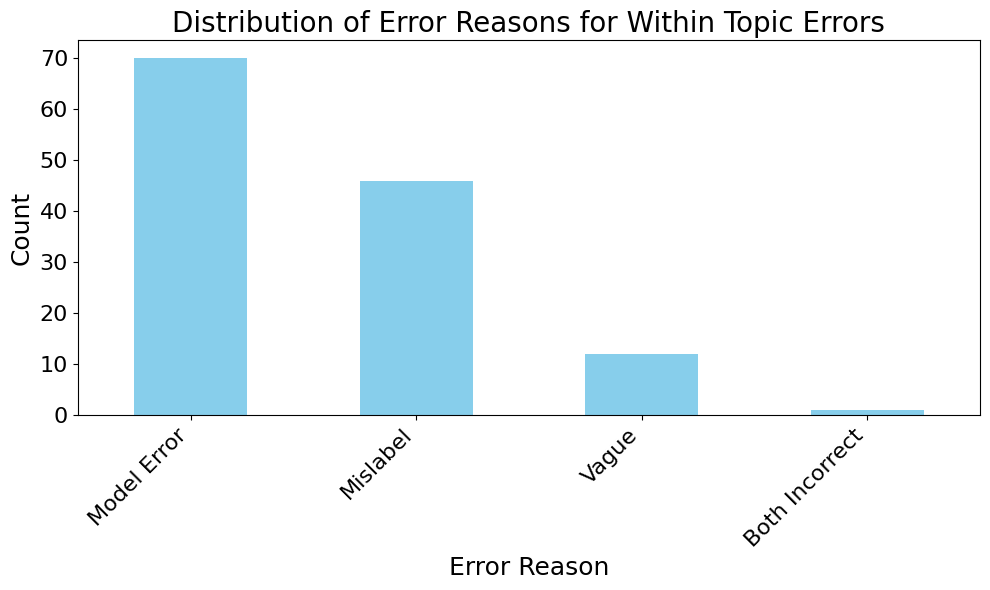

In [13]:
error_counts_in = within_topic_df['Error Reason'].value_counts()

plt.figure(figsize=(10, 6))

error_counts_in.plot(kind='bar', color='skyblue')
plt.title('Distribution of Error Reasons for Within Topic Errors', fontsize=20)

plt.xlabel('Error Reason', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()

plt.savefig('error_reasons_distribution_in.png', dpi=300)

plt.show()


In [14]:
error_counts_in = within_topic_df['Error Reason'].value_counts()
error_counts_in

Error Reason
Model Error       70
Mislabel          46
Vague             12
Both Incorrect     1
Name: count, dtype: int64

In [15]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

mislabels_in = within_topic_df[within_topic_df['Error Reason'] == "Mislabel"].copy()
mislabels_in['cluster_bins'] = pd.cut(mislabels_in['Cluster confidence'], bins)
mislabel_bins_in = mislabels_in['cluster_bins'].value_counts(sort=False)

model_error_in = within_topic_df[within_topic_df['Error Reason'] == "Model Error"].copy()
model_error_in['cluster_bins'] = pd.cut(model_error_in['Cluster confidence'], bins)
model_error_bins_in = model_error_in['cluster_bins'].value_counts(sort=False)

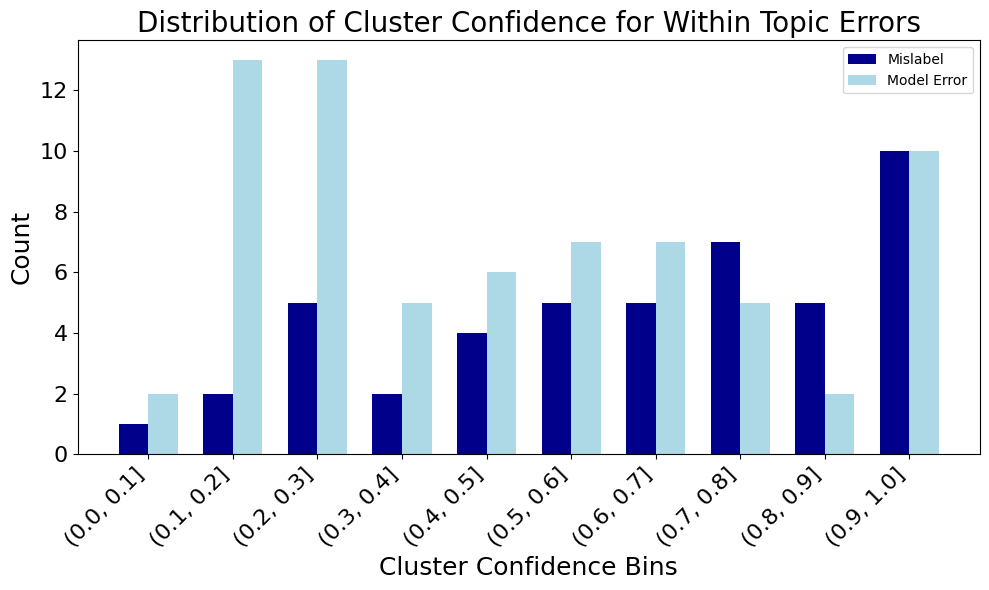

In [16]:
bar_width = 0.35
index = range(len(mislabel_bins_in))
plt.figure(figsize=(10, 6))
plt.bar(index, mislabel_bins_in, bar_width, color='darkblue', label='Mislabel')
plt.bar([i + bar_width for i in index], model_error_bins_in, bar_width, color='lightblue', label='Model Error')

plt.title('Distribution of Cluster Confidence for Within Topic Errors', fontsize=20)

plt.xlabel('Cluster Confidence Bins', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.xticks([i + bar_width / 2 for i in index], [str(bin) for bin in mislabel_bins_in.index], rotation=45, ha='right')

plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.legend()

plt.tight_layout()

plt.savefig('cluster_bins_in.png', dpi=300)

plt.show()

### All Errors:

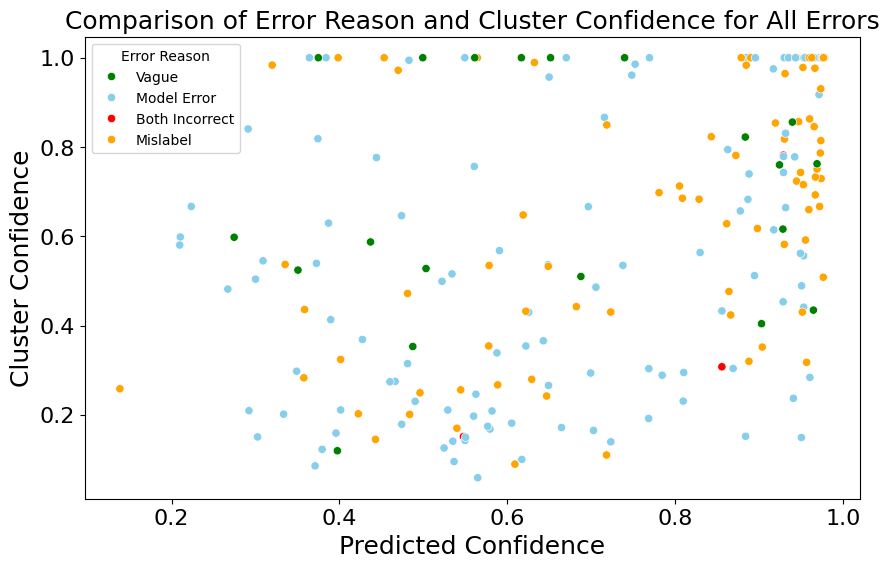

In [30]:
plt.figure(figsize=(10, 6))

all_errors_df = pd.concat([out_of_topic_df, within_topic_df], ignore_index=True)

sns.scatterplot(data=all_errors_df, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette=error_reason_palette)

plt.title('Comparison of Error Reason and Cluster Confidence for All Errors', fontsize=18)


plt.xlabel('Predicted Confidence', fontsize=18)
plt.ylabel('Cluster Confidence', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(title="Error Reason")

plt.savefig('cluster_confidence_scatter_all.png', dpi=300)

plt.show()

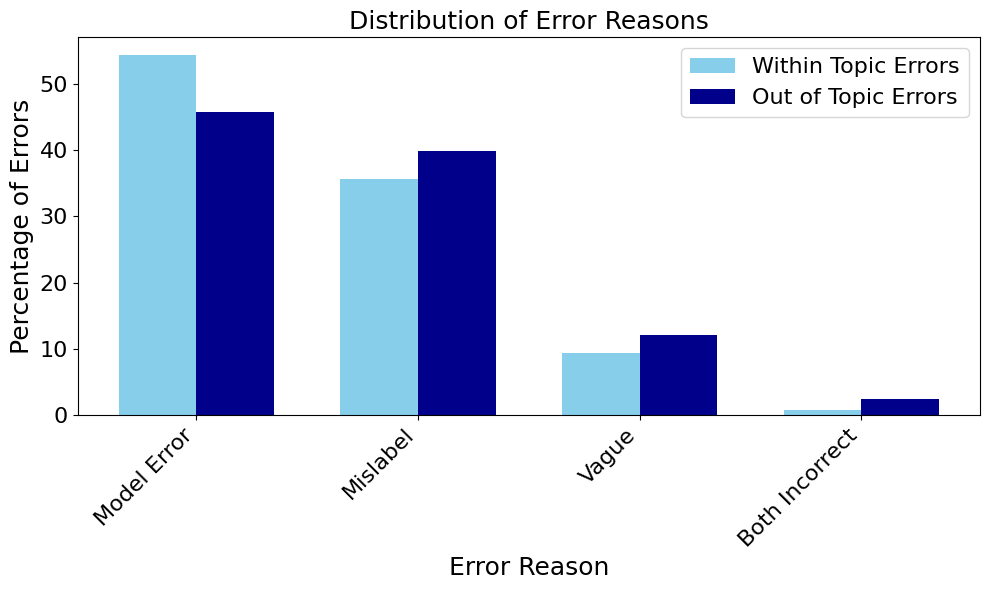

In [25]:
error_counts_in = within_topic_df['Error Reason'].value_counts()
error_counts_out = out_of_topic_df['Error Reason'].value_counts()

total_in = error_counts_in.sum()
total_out = error_counts_out.sum()

percentages_in = error_counts_in / total_in * 100
percentages_out = error_counts_out / total_out * 100

bar_width = 0.35
index = range(len(percentages_in))

plt.figure(figsize=(10, 6))
plt.bar(index, percentages_in, bar_width, color='skyblue', label='Within Topic Errors')
plt.bar([i + bar_width for i in index], percentages_out, bar_width, color='darkblue', label='Out of Topic Errors')

plt.title('Distribution of Error Reasons', fontsize=18)
plt.xlabel('Error Reason', fontsize=18)
plt.ylabel('Percentage of Errors', fontsize=18)
plt.xticks([i + bar_width / 2 for i in index], error_counts_in.index, rotation=45, ha='right')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()

plt.savefig('all_error_distribution.png', dpi=300)
plt.show()



### Correct Classifications:

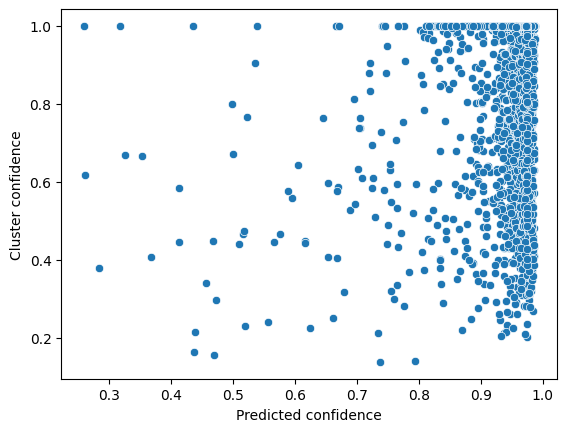

In [17]:
non_errors_df = BERT_bank_df[(BERT_bank_df["Assigned label"] == BERT_bank_df["Cluster label"]) & (BERT_bank_df["Assigned label"] == BERT_bank_df["Predicted label"]) ]

sns.scatterplot(data=non_errors_df, x="Predicted confidence", y="Cluster confidence")
plt.show()

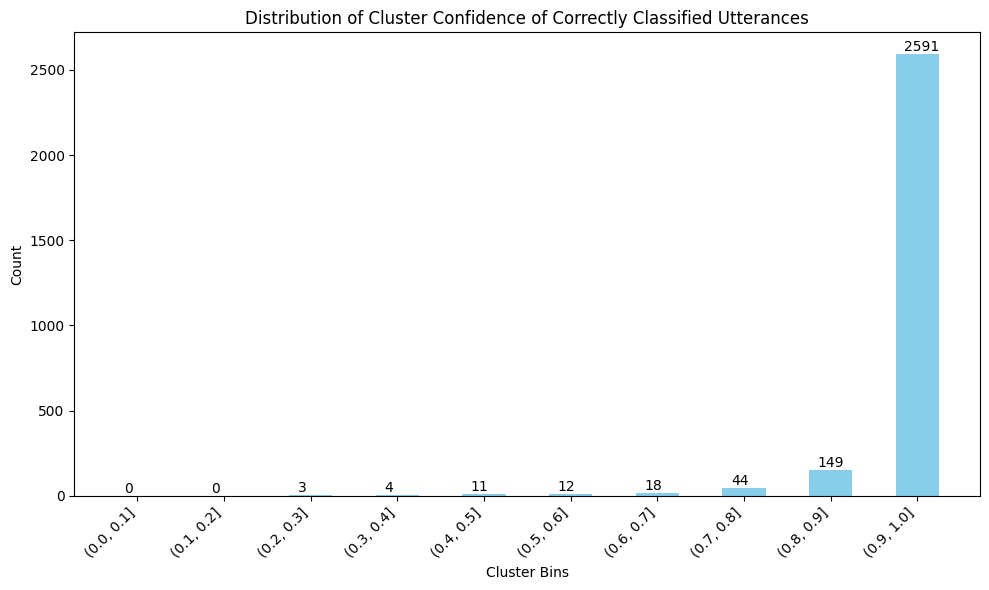

In [18]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
correct_utt = non_errors_df.copy()
correct_utt['cluster_bins'] = pd.cut(correct_utt['Predicted confidence'], bins)

bins_correct = correct_utt['cluster_bins'].value_counts(sort=False)

bar_width = 0.5
index = range(len(bins_correct))
plt.figure(figsize=(10, 6))
bars = plt.bar(index, bins_correct, bar_width, color='skyblue')
plt.title('Distribution of Cluster Confidence of Correctly Classified Utterances')
plt.xlabel('Cluster Bins')
plt.ylabel('Count')
plt.xticks([i for i in index], [str(bin) for bin in bins_correct.index], rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2-0.15, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()

In [19]:
len(non_errors_df)

2832

In [52]:
correct_df = non_errors_df.copy()
incorrect_df = all_errors_df.copy()
filtered_errors_df = all_errors_df[(all_errors_df["Error Reason"] != "Vague") & (all_errors_df["Error Reason"] != "Both Incorrect")]

correct_df["Error Reason"] = "No Error"
incorrect_df["Error Reason"] = "Error"

both_df = pd.concat([correct_df, incorrect_df], ignore_index=True)
both_df2 = pd.concat([correct_df, filtered_errors_df], ignore_index=True)


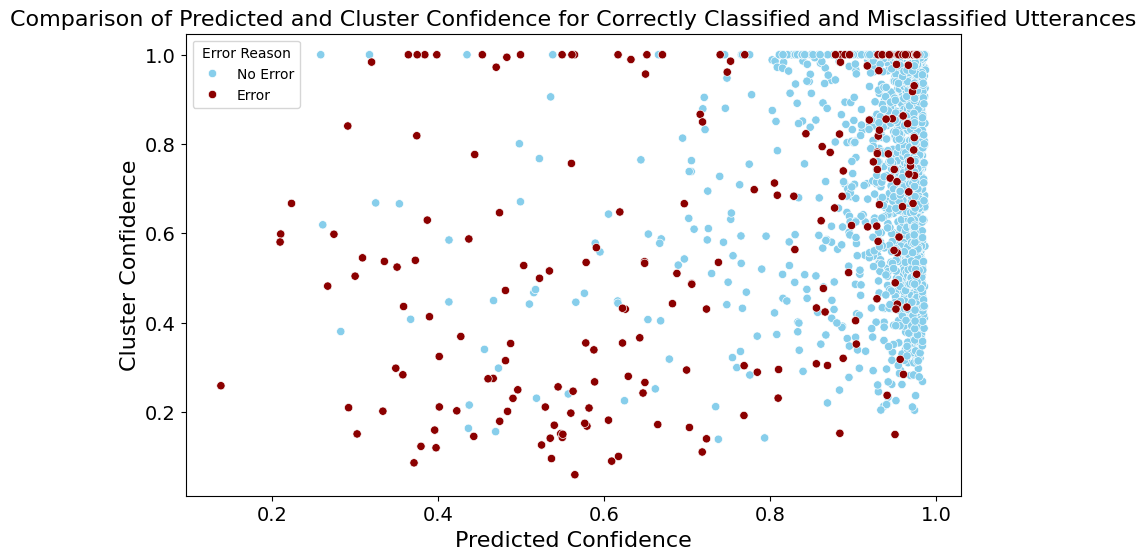

In [46]:
error_palette = {"Error": "darkred", "No Error": "skyblue"}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=both_df, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette=error_palette)

plt.title('Comparison of Predicted and Cluster Confidence for Correctly Classified and Misclassified Utterances', fontsize=16)
plt.xlabel('Predicted Confidence', fontsize=16)
plt.ylabel('Cluster Confidence', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Error Reason")

# plt.savefig('cluster_confidence_scatter_all.png', dpi=300)
plt.show()

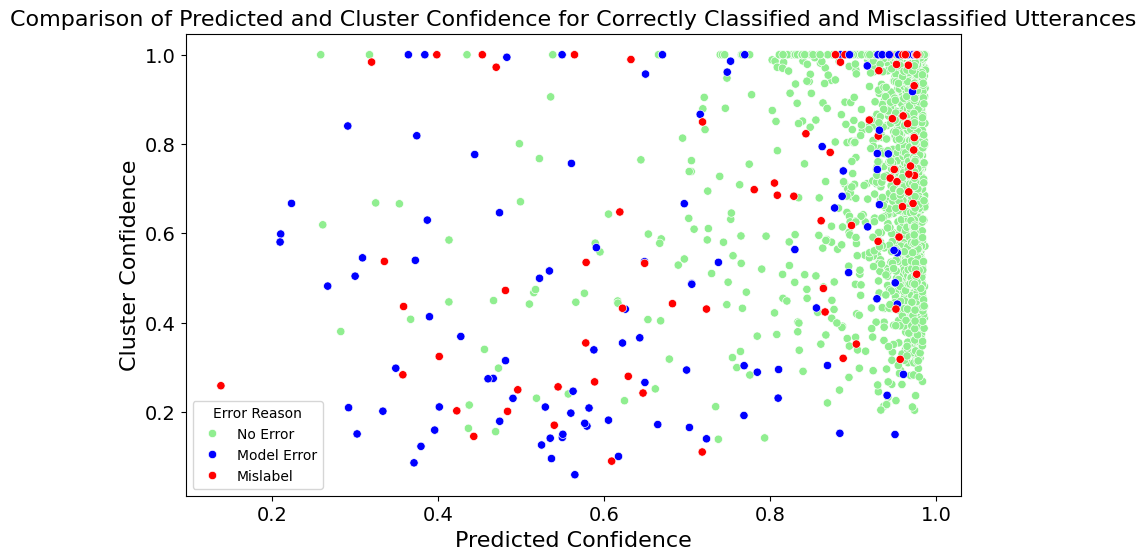

In [53]:
error_palette2 = {"No Error": "lightgreen", "Mislabel": "red", "Model Error":"blue"}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=both_df2, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette=error_palette2)

plt.title('Comparison of Predicted and Cluster Confidence for Correctly Classified and Misclassified Utterances', fontsize=16)
plt.xlabel('Predicted Confidence', fontsize=16)
plt.ylabel('Cluster Confidence', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Error Reason")

# plt.savefig('cluster_confidence_scatter_all.png', dpi=300)
plt.show()

### Files:

In [ ]:
# from google.colab import files
# files.download('error_reasons_distribution_in.png')
# files.download('error_reasons_distribution_out.png')
# files.download('cluster_confidence_scatter_in.png')
# files.download('cluster_confidence_scatter_out.png')
# files.download('cluster_confidence_scatter_all.png')
# files.download('cluster_bins_in.png')
# files.download('cluster_bins_out.png')